In [ ]:
# https://www.datacamp.com/tutorial/k-means-clustering-python


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

In [6]:
X.shape

(1000, 2)

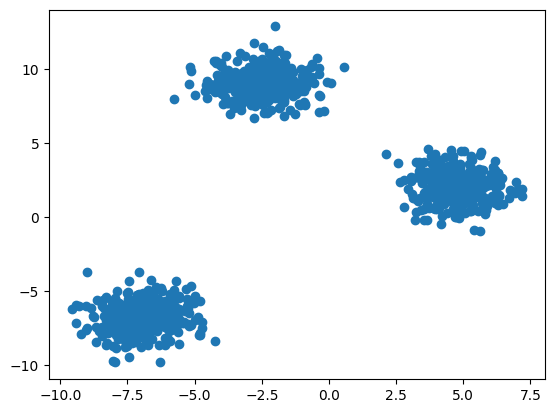

In [7]:
plt.scatter(X[:, 0], X[:,1])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
from sklearn.cluster import KMeans

# Manual Process
## Elbow Method to select the K Value

In [10]:
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[44450.72387542038,
 24230.221501637512,
 1329.7219815435355,
 1178.5730901554853,
 1020.0791922324208,
 876.0317590832051,
 893.979928605183,
 697.6468744231815,
 602.9853924435317,
 571.3231107834489]

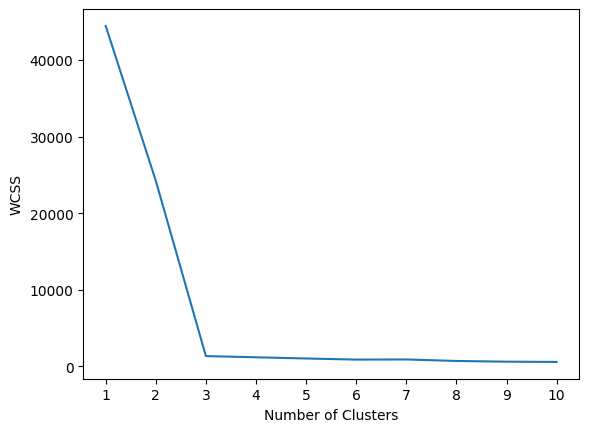

In [12]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [14]:
y_labels = kmeans.fit_predict(X_train)

In [15]:
y_test_labels = kmeans.predict(X_test)

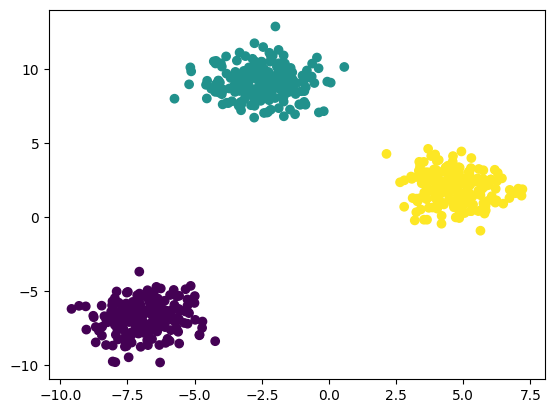

In [16]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)

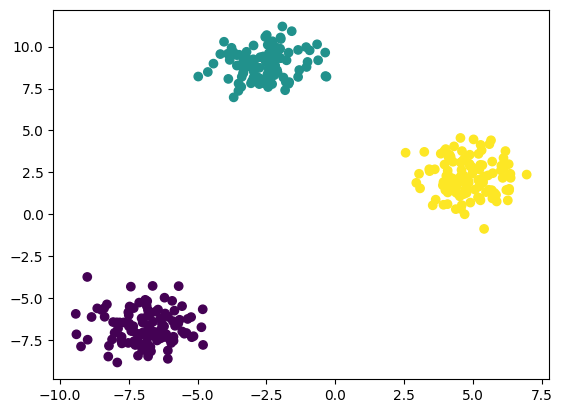

In [17]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_labels)

# Automate the step using Knee Locator

!pip install kneed

In [20]:
# !pip install kneed

In [21]:
from kneed import KneeLocator 

In [22]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

3

# Performance Metrics

### Silhouette Score

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [25]:
silhouette_coefficients

[0.7024009416893275,
 0.8417121581954964,
 0.6709745190005654,
 0.48489469119480794,
 0.506093312477171,
 0.3352050409933756,
 0.32855683422647963,
 0.3355172940895252,
 0.33428184385206017]

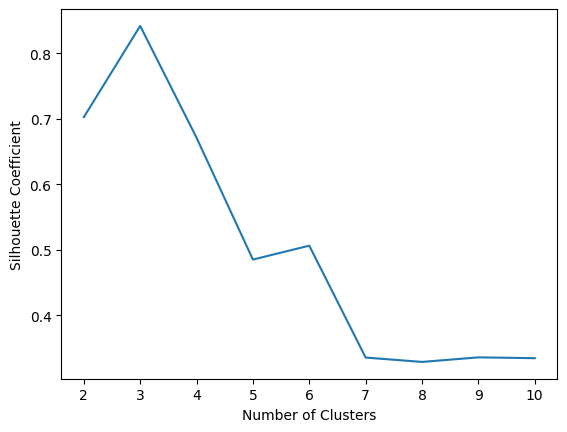

In [26]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()